In [41]:
# Pure state and Expectation value
import numpy as np

# Preparation of the state
d = 3 # the system's dimension
basis = np.eye(d) # orthonormal basis (using identity matrix)
cs = np.array([1/np.sqrt(3),1j/np.sqrt(3),-1/np.sqrt(3)]) # some coefficients (normalised)
psi = sum([c*basis[j] for j,c in enumerate(cs)]) # the state psi # enumerate return (index, element)

# Preparation of the operator
A = np.array([[1,0,0],[0,2,0],[0,0,3]]) # some operator

# expectation value of A in state psi
exp_A = np.real(psi.T @ A @ psi)

In [2]:
# Mixed state and Expectation value
import numpy as np

# Preparation of the density matrix
d = 3 # the system's dimension
basis = np.eye(d) # orthonormal basis (using identity matrix)
ps = np.array([0.1,0.3,0.6]) # some probabilities (normalised)
rho = sum([p * np.outer(basis[j],basis[j].conjugate()) for j,p in enumerate(ps)]) # density operator

# Preparation of the operator
A = np.array([[1,0,0],[0,2,0],[0,0,3]]) # some operator

# expectation value of some operator in some state
exp_A = np.trace(rho @ A)
print(exp_A)

2.5


In [8]:
# Constructing a composite system with Tensor product

d = 2 # the system's dimension
basis = np.eye(d) # orthonormal basis (using identity matrix)

cs1 = np.array([1,0])
cs2 = np.array([0,1])

psi1 = sum([c*basis[j] for j,c in enumerate(cs1)]) 
psi2 = sum([c*basis[j] for j,c in enumerate(cs2)])

psi = np.kron(psi1,psi2) # kronecker product

print(psi)

[0. 1. 0. 0.]


In [25]:
# Bipartite pure state
theta=np.pi/3 # 0 and pi/2 is a separable state. pi/4 maximally entangled
d1=d2=2
basis = np.eye(d1*d2)
cs = np.array([np.cos(theta),0,0,np.sin(theta)])
psi_theta = sum([c*basis[j] for j,c in enumerate(cs)])

rho_theta=np.outer(psi_theta,psi_theta.conjugate()) # create a pure state
print(np.trace(rho_theta * rho_theta)) # Measure the degree of mixedness: purity

0.625


In [26]:
# partial trace to obtain the marginal state
rho1 = np.trace(rho_theta.reshape(d1,d2,d1,d2), axis1=0, axis2=2)
rho2 = np.trace(rho_theta.reshape(d1,d2,d1,d2), axis1=1, axis2=3)
print(rho1)
print(rho2)

[[0.25 0.  ]
 [0.   0.75]]
[[0.25 0.  ]
 [0.   0.75]]


In [39]:
# Pure state and Expectation value from qutip
import qutip

phi=Qobj([[1/np.sqrt(3)],[1j/np.sqrt(3)],[-1/np.sqrt(3)]]) # create a ket state
B=Qobj(np.array([[1,0,0],[0,2,0],[0,0,3]])) # create an operator
phi_dagger=phi.conj().trans() # the corresponding daggered state

try:
  exp_B = phi_dagger @ B @ phi # expectation value
except:
  print("OperationError")
else:
  print(np.real(exp_B)) # get rid of the immaginary part
finally:
  print(phi)
  print(B)
  print(phi_dagger)


2.0000000000000004
Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.57735027+0.j        ]
 [ 0.        +0.57735027j]
 [-0.57735027+0.j        ]]
Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
Quantum object: dims=[[1], [3]], shape=(1, 3), type='bra', dtype=Dense
Qobj data =
[[ 0.57735027-0.j          0.        -0.57735027j -0.57735027-0.j        ]]


In [46]:
# numpy array 

x2darray = np.array([1,2,3,4,5,6]) # 2D array
x2darray = x2darray.reshape((2,3))
x3darray = np.zeros((2, 2, 2)) # 3D array
x4darray = np.arange(16).reshape((2, 2, 2, 2)) # 4D array

print(x2darray)
print(x2darray[0,1])
print(x3darray[0,1,0])
print(x4darray)
print(np.trace(x4darray, axis1=0, axis2=1))

[[1 2 3]
 [4 5 6]]
2
0.0
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[[12 14]
 [16 18]]


In [56]:
# numpy N-dimensional array trace 

x4darray = np.arange(16).reshape((2, 2, 2, 2)) # 4D array

print(np.trace(x4darray))
x00 = sum([x4darray[i,i,0,0] for i in range(2)]) # trace of the sub-2D array
x01 = sum([x4darray[i,i,0,1] for i in range(2)])
x10 = sum([x4darray[i,i,1,0] for i in range(2)])
x11 = sum([x4darray[i,i,1,1] for i in range(2)])
print(np.array([[x00,x01],[x10,x11]]))

print(np.trace(x4darray, axis1=0, axis2=2))
x00 = sum([x4darray[i,0,i,0] for i in range(2)]) # trace of the sub-2D array
x01 = sum([x4darray[i,0,i,1] for i in range(2)])
x10 = sum([x4darray[i,1,i,0] for i in range(2)])
x11 = sum([x4darray[i,1,i,1] for i in range(2)])
print(np.array([[x00,x01],[x10,x11]]))

[[12 14]
 [16 18]]
[[12 14]
 [16 18]]
[[10 12]
 [18 20]]
[[10 12]
 [18 20]]


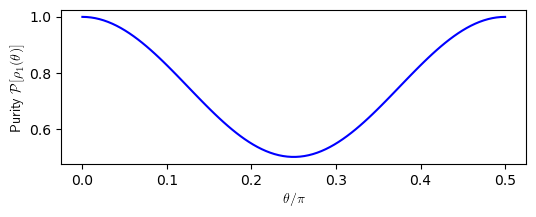

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Purity of state rho
def Purity(rho):
  return np.trace(rho.dot(rho))

# Partial trace of bipartite systems
def PartialTrace(rho,d1,d2,system=1):
  axis1,axis2 = 0,2
  if system == 2:
    axis1 += 1
    axis2 += 1
  return np.trace(rho.reshape(d1,d2,d1,d2), axis1=axis1, axis2=axis2)

d1,d2 = 2,2 # dimension of each subsystem
B1,B2 = np.eye(d1),np.eye(d2) # basis for each subssystem
thetas = np.linspace(0,np.pi/2,100) # angle for superposition coefficient
purity = [] # purity set

for theta in thetas: # iterate over theta
  psi = (np.cos(theta)*np.kron(B1[0],B2[0])+np.sin(theta)*np.kron(B1[1],B2[1])) # state vector
  rho = np.outer(psi,psi.conjugate()) # density operator associated to psi
  rho1 = PartialTrace(rho,d1,d2,system=1) # marginal state of system 1
  purity.append(Purity(rho1)) # calculate and append purity

fig,ax = plt.subplots(figsize = (6,2))
ax.plot(thetas/np.pi,purity, color = 'blue');
ax.set_xlabel(r'$\theta/\pi$', usetex = True, fontsize = 10);
ax.set_ylabel(r'Purity $\mathcal{P}[\rho_1(\theta)]$', usetex = True, fontsize = 10);